# Analytic Inverse Kinematics of the NYU finger in the plane

As we saw in the last laboratories, it is not obvious to get the tip of the finger to follow a given movement, such as a circle. We know the forward kinematics of the robot, which gives us the position of the fingertip given joint angles. Today we will work out the inverse function, to get joint angles given fingertip positions: this is called inverse kinematics. To keep the problem manageable, we will work with the robot in "2D" and keep the first joint at a constant 0 position.


## Instructions
Answer all the questions below and submit a pdf with detailed answers to these questions, including the plots through Brightspace. You will also need to submit the Jupyter notebooks with the code used to answer the questions.


## Robot model
Consider the following kinematic model of the robot <img src="./3d_robot_model.png" width="700">

## 3D forward kinematics solution

In the last laboratory we computed the forward kinematics of the robot. We wrote the forward kinematics of the robot as a succession of primitive transformations. The resulting analytic formula can be computed easily for this robot. It is
$$ T_{SF} = \begin{bmatrix} \cos(\theta_1+\theta_2) & -\sin(\theta_1+\theta_2) & 0 & l_0 + l_1\sin\theta_1 + l_2 \sin(\theta_1 + \theta_2) \\ \cos\theta_0 \sin(\theta_1 + \theta_2) & \cos\theta_0 \cos(\theta_1 + \theta_2) & \sin\theta_0 & -\cos\theta_0 (l_1 \cos\theta_1 + l_2 \cos(\theta_1 + \theta_2)) - l_3\sin\theta_0 \\ \sin\theta_0 \sin(\theta_1 + \theta_2) & \sin\theta_0 \cos(\theta_1 + \theta_2) & \cos\theta_0 & -\sin\theta_0 (l_1 \cos\theta_1 + l_2 \cos(\theta_1 + \theta_2)) + l_3\cos\theta_0 \\ 0 & 0 & 0 & 1 \end{bmatrix} $$

## Restriction to 2D
To keep the problem simple, in this laboratory we will keep $\theta_0 = 0$ constant. We then get
$$ T_{SF} = \begin{bmatrix} \cos(\theta_1+\theta_2) & -\sin(\theta_1+\theta_2) & 0 & l_0 + l_1\sin\theta_1 + l_2 \sin(\theta_1 + \theta_2) \\  \sin(\theta_1 + \theta_2) &  \cos(\theta_1 + \theta_2) & 0 & -(l_1 \cos\theta_1 + l_2 \cos(\theta_1 + \theta_2))  \\ 0 & 0 & 1 & l_3 \\ 0 & 0 & 0 & 1 \end{bmatrix} $$

and indeed the $z$ direction is always constant - we will ignore it from the rest of the laboratory.


## Position of the end-effector in 2D

The position of the end-effector (in the S frame) is therefore
$$ p_{SF} = \begin{pmatrix} l_0 + l_1\sin\theta_1 + l_2 \sin(\theta_1 + \theta_2) \\ - \left(l_1 \cos\theta_1 + l_2 \cos(\theta_1 + \theta_2)\right) \\ l_3 \end{pmatrix}$$

## Inverse kinematics problem

The inverse kinematics problem is the following: given a desired $p_{SF} = (x_{des},y_{des}, z_{des})$ position for the fingertip, can we find configurations $\theta_0$, $\theta_1$ and $\theta_2$ that would attain this position (if they exist)? The goal of an analytic inverse kinematics algorithm is to find all (if any) possible solutions to this problem in closed form. 

Note: we will see in later labs how to solve the problem with an iterative algorithm without computing the exact formulae, which will be useful for the 3D case when $\theta_0$ is not constant.

## Question 1: analyzing possible solutions
1. Remember that to keep the problem "simple" we constrain the solutions to be such that $\theta_0 = 0$. What is the range of positions that the fingertip can attain? What is the geometric shape of this workspace (i.e. the positions that the fingertip can attain).
2. Assume that the distance between the frame {H2} and the fingertip {F} is noted $l_{des} = \sqrt{(x_{des} - l_0)^2 + y_{des}^2}$, what is the largest value that $l_{des}$ can have? How many solutions to the inverse kinematics problem will there be when $l_{des}$ reaches its maximum? (describe them qualitatively)
4. If $l_{des}$ is now smaller than its possible largest value, how many solutions to the inverse kinematics problem will there be? (describe them qualitatively)

## Computing the analytic inverse kinematics
We need to find a way to relate the angles to the position of the fingertip. In our case, we will consider the influence of the joint angles on the finger length and then on its overall orientation.

Consider the triangle formed by $l_{des}$, $l_1$ and $l_2$. Using the [law of cosines](https://en.wikipedia.org/wiki/Law_of_cosines) we have the relation
$$l_{des}^2 - l_1^2 - l_2^2 = -2l_1 l_2 \cos(\pi - \theta_2)$$
which gives
$$\cos(\theta_2) = \frac{l_{des}^2 - l_1^2 - l_2^2}{2l_1 l_2}$$

<img src="./ik_schematic1.jpg" width="400">

we have then two possible choice 
1. $$\theta_2^+ = \arccos(\frac{l_{des}^2 - l_1^2 - l_2^2}{2l_1 l_2})$$
2. $$\theta_2^- = -\arccos(\frac{l_{des}^2 - l_1^2 - l_2^2}{2l_1 l_2})$$

We will denote $\theta_2^+$ the positive solution (when the finger is bent with joint 2 pointing left) and $\theta_2^-$ the other solution (with joint 2 pointing toward the right).

We have seen that $\theta_2$ fixes the distance from {H2} to {F}. $\theta_1$ will then fix the position of the fingertip on the circle defined by the finger length. First we define some helpful quantities.

<img src="./ik_schematic2.jpg" width="400">

The angle between the line going from ${H2}$ to ${F}$ and the horizontal line going from ${H}$ to the right direction is $$\beta = \arctan2(y_{des}, x_{des} - l_0)$$
and the angle between $l_1$ and the {H2}-{F} line is (using again the law of cosines)
$$\alpha = \arccos(\frac{-l_2^2 + l_1^2 + l_{des}^2}{2l_1l_{des}})$$

We need to consider two distinct cases:

1. If we chose $\theta_2^+$: in this case, we have $\theta_1^+ = \pi/2 - \alpha + \beta$
2. If we chose $\theta_2^-$: in this case, we have $\theta_1^- = \pi/2 + \alpha + \beta$

## Question 2

1. Write an inverse kinematics function that takes a desired x,y position for the fingertip and returns a list of all possible solutions (if any) in terms of joint angles for $\theta_0$, $\theta_1$ and $\theta_2$.

2. Test you function using the ``test_IK function`` and the ``forward_kinematics`` function you implemented in the previous laboratory. ``test_IK function`` will generate a random desired (x,y) position for the fingertip, then compute the IK and verify that all the returned solutions are correct by computing the forward kinematics solution of each and verifying that ``forward_kinematics(inverse_kinematics(x, y)) = (x, y)``  

In [1]:
#setup nice plotting
%matplotlib notebook

# we import useful libraries
import time
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt

# we import the helper class / we will use a similar class to work with the real robot
use_real_robot = False

if use_real_robot:
    from nyu_finger import NYUFingerReal    
else:
    from nyu_finger_simulator import NYUFingerSimulator

pybullet build time: May  2 2022 08:10:41


In [2]:
# here we define the global variables for the robot size
l0 = 0.3
l1 = 0.16
l2 = 0.16
l3 = 0.014

In [3]:
### COPY PASTE YOUR FORWARD KINEMATICS FUNCTION HERE FROM LAB 2
def forward_kinematics(q):
    return np.eye(4)

In [4]:
def inverse_kinematics(x,y):
    """
    inverse kinematics function
    input (x,y) position of the fingertip
    output a list of 3D vectors which are possible solutions to the problem 
    (the list is empty if there are no solutions)
    """
    # TO BE COMPLETED
    return []

In [5]:
def test_IK(num_tests = 10):
    """
    This function is used to test the inverse kinematics function
    it generates num_tests random (x,y) locations and try to solve them
    it prints potential errors
    """
    num_errors = 0
    num_infeasible = 0
    points = np.zeros([num_tests, 2])
    colors = np.zeros([num_tests, 1])
    
    for i in range(num_tests):
        # we generate a random (x,y) location in a box of l1+l2 around {H}
        x = np.random.random_sample()*(l1+l2)*2 - (l1+l2) + l0
        y = np.random.random_sample()*(l1+l2)*2 - (l1+l2)

        # we save the point for plotting
        points[i,0] = x
        points[i,1] = y
        
        solutions = inverse_kinematics(x,y)
        
        l_des = np.sqrt((x-l0)**2 + y**2)
        if l_des > l1+l2:
            num_infeasible += 1
            colors[i] = 1
            
        if not solutions:
            # we did not find solutions
            # check if this is correct
            if l_des <= l1+l2:
                print(f'ERROR: IK did not find a solution while there should be at least one, for x={x} and y={y}')
                num_errors +=1
        else:
            for sol in solutions:
                pose = forward_kinematics(sol)
                x_ik = pose[0,3]
                y_ik = pose[1,3]
                error = np.sqrt((x-x_ik)**2 + (y-y_ik)**2)
                if error > 0.001:
                    print(f'solution {sol} did not find the correct IK solution x_des = {x}, y_des = {y} but found x_ik = {x_ik} and y_ik = {y_ik}')        
                    num_errors +=1
                    
    print(f'there were {num_tests-num_infeasible} feasible samples and {num_infeasible} infeasible ones')
    if num_errors > 0:
        print(f'there were {num_errors} errors detected')
    else:
        print('CONGRATS: no errors were detected!')
        
test_IK(10000)

ERROR: IK did not find a solution while there should be at least one, for x=0.39842175782832434 and y=0.26803820182311716
ERROR: IK did not find a solution while there should be at least one, for x=0.3981808227975297 and y=-0.014405000237724674
ERROR: IK did not find a solution while there should be at least one, for x=0.15645233515999782 and y=0.2063127718140278
ERROR: IK did not find a solution while there should be at least one, for x=0.5094176405554278 and y=0.038117089119462044
ERROR: IK did not find a solution while there should be at least one, for x=0.14992878634354376 and y=-0.04441083538342483
ERROR: IK did not find a solution while there should be at least one, for x=0.3500676904300718 and y=-0.1815955872950827
ERROR: IK did not find a solution while there should be at least one, for x=0.5081295610576299 and y=0.18106364432732985
ERROR: IK did not find a solution while there should be at least one, for x=0.2594812360184731 and y=0.23202653108577226
ERROR: IK did not find a s

# Question 3: reaching controller
The code below generates 3 target ball locations (and display them). Their locations are in the variable ball_position (a list containing 2D vectors of x,y positions).

1. Modify the code below (our typical control loop with a PD controller) such that the robot moves from its current position to each ball successively. Use the inverse kinematics function to decide what the end joint angles should be. Interpolate the motion to the desired goal such that the total time for one reaching movement is T=3 seconds (i.e. go from initial configuration to ball1 in 3 seconds, from ball1 to ball2 in 3 seconds, etc).

2. Use the plotting function below to plot the motion of the fingertip in space and the joint position/velocity trajectories. How well does it go through the targets?

3. [Optional] Answer question 2. with the real robot

In [6]:
if use_real_robot:
    # Triggers the real robot
    # Don't forget to turn on the robot first !!!
    robot = NYUFingerReal()
    # Make sure that the motor number matches that on the robot
    motor_number = np.array([1,2,3])
    robot.initialize('ens1', motor_number)
else:
    # we can now create a robot simulation
    robot = NYUFingerSimulator()

# we reset the simulation
if not use_real_robot:
    robot.reset_state([0,0,0])

    
# we simulate for 6 seconds (3 seconds per goal)
run_time = 9.
dt = 0.001
num_steps = int(run_time/dt)

# the PD gains
P = np.array([1.5, 1.5, 1.5])
D = np.array([0.01, 0.01, 0.01])

## we allocate a few vectors to collect data while we do the simulation
# we will store the sensor values (angular position and velocities)
measured_positions = np.zeros([num_steps,3])
measured_velocities = np.zeros_like(measured_positions)
# we will store the commands sent to the robot
desired_torques = np.zeros_like(measured_positions)
# we will store the desired joint trajectories that the PD controller follows
desired_positions = np.zeros_like(measured_positions)
desired_velocities = np.zeros_like(measured_positions)
# we keep track of time
time = np.zeros([num_steps])
# we will store the end effector position (desired and measured)
measured_finger_position = np.zeros([num_steps,3])
desired_finger_position = np.zeros([num_steps,3])



# here we create a list of ball positions and display them
ball_positions = [np.array([0.597,-0.056]), np.array([0.521,0.12]), np.array([0.3,-0.225])]
if not use_real_robot:
    for ball in ball_positions:
        robot.add_ball(ball[0], ball[1])
else:
    # we wait
    for i in range(7500):
        robot.send_joint_torque(np.zeros([3,1]))
        robot.step()

# the time to reach a goal
time_to_goal = 3.0

# we use this to know which target we are currently aiming
ball_number = 0

# we measure the internal time for one target movement
t = 0.



## this is our main control loop ##
## we do the loop for num_steps ##
for i in range(num_steps):
    # get the current time and save it
    time[i] = dt * i
    
    # we read the position and velocities of the joints from the robot or simulation
    q, dq = robot.get_state()
    
    # we store these values for later use
    measured_positions[i,:] = q
    measured_velocities[i,:] = dq
    
    # save the current position of the fingertip using the FK function
    pose = forward_kinematics(q)
    measured_finger_position[i,:] = pose[0:3,3]
    
    # controller: TODO HERE IMPLEMENT YOUR CONTROLLER TO REACH ALL 3 TARGETS
    # the goal here is to compute q_des and dq_des that the PD controller will follow
    # you will need some internal logic to decide which ball you are currently targetting, etc.

    # change this according to your needs so the robot moves according to your goals
    q_des = np.array([0, 0, 0])
    dq_des = np.array([0, 0, 0])
    
    ### end user code
    
    
    # we save the desired positions/velocities for later plotting 
    desired_positions[i,:] = q_des
    desired_velocities[i,:] = dq_des
    
    ##PD controller
    error = q_des - q # the position error for all the joints (it's a 3D vector)
    d_error = dq_des-dq # the velocity error for all the joints
    
    # we compute the desired torques as a PD controller
    joint_torques = P * error + D * d_error
    desired_torques[i,:] = joint_torques
    
    # we send them to the robot and do one simulation step
    robot.send_joint_torque(joint_torques)
    robot.step()

<IPython.core.display.Javascript object>


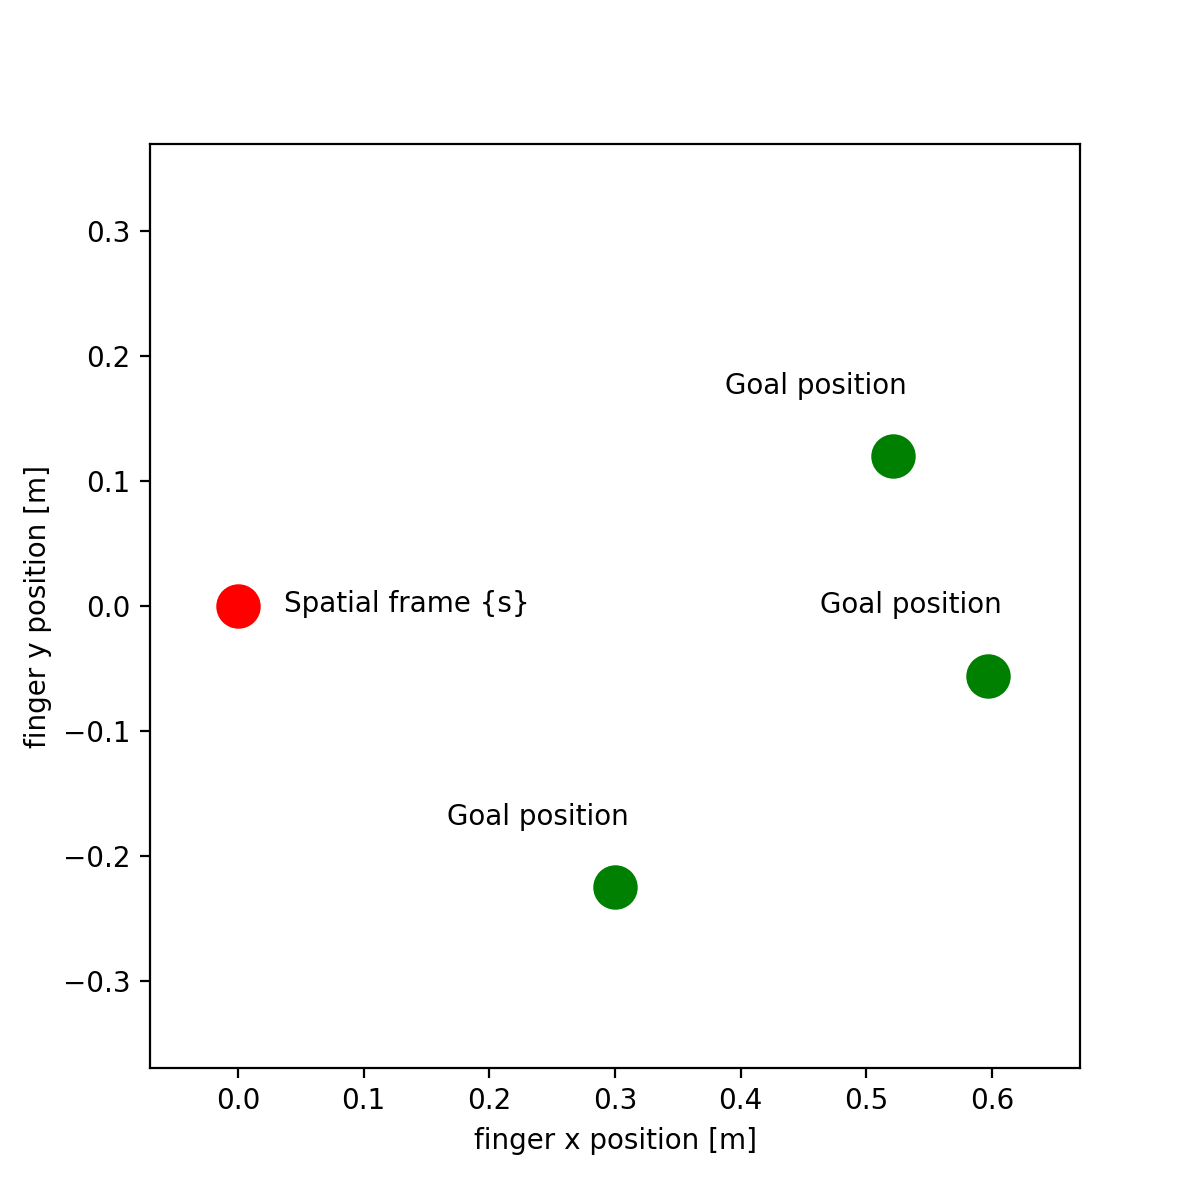

<IPython.core.display.Javascript object>


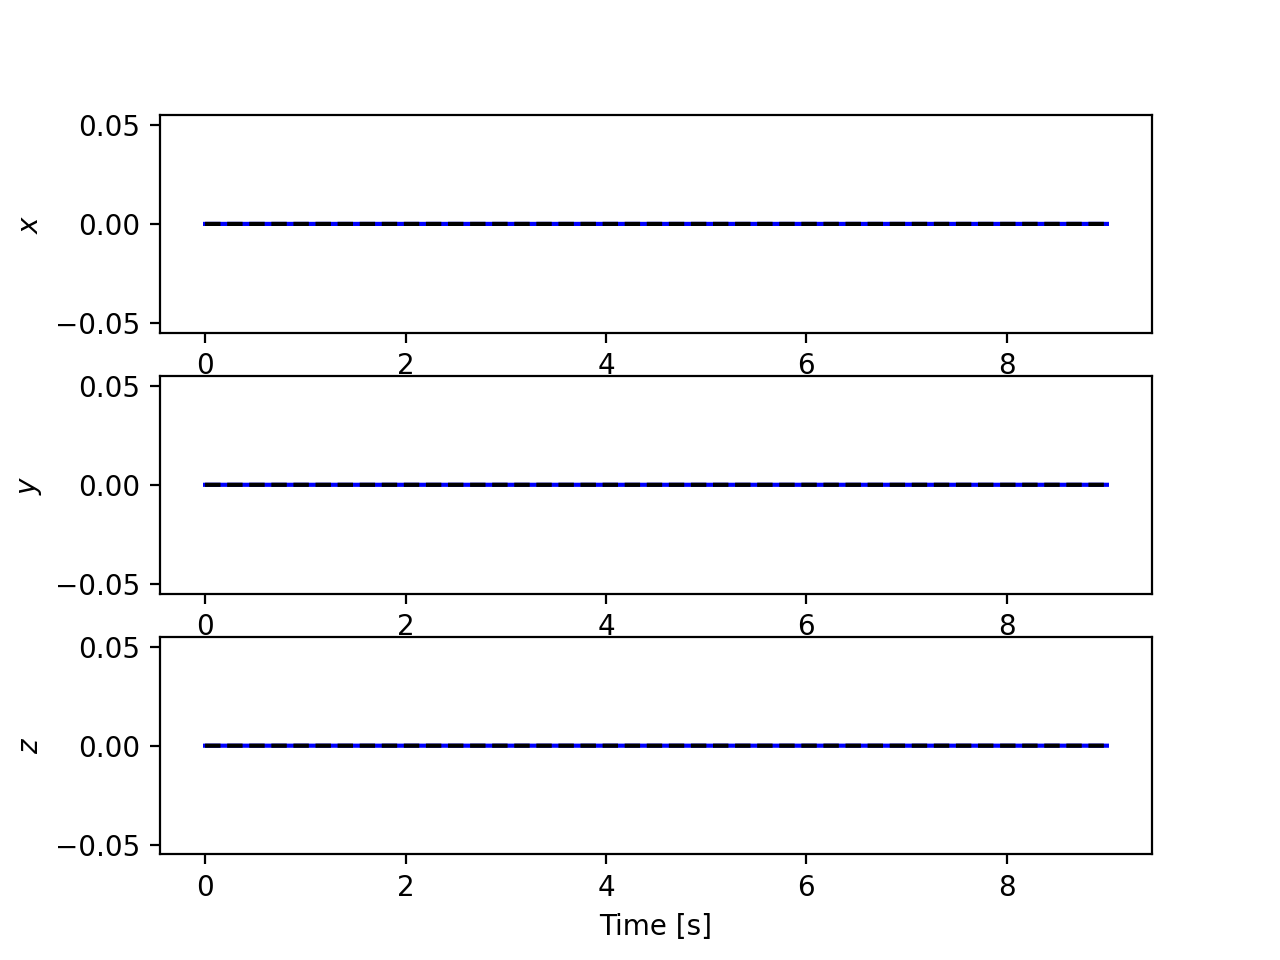

In [7]:
def plot_finger_trajectory(finger_position, ball_positions):
    """
    plots the position of the finger in 2D and the position of the spatial frame {s}
    we assume that the time varying x variable is in x_pos and that the y variable is in y_pos
    """
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    plt.plot(finger_position[:,0],finger_position[:,1], 'b')
    plt.xlabel('finger x position [m]')
    plt.ylabel('finger y position [m]')
    plt.xlim([-l1-l2+l0-0.05,l0+l1+l2+0.05])
    plt.ylim([-l1-l2-0.05, l1+l2+0.05])
    plt.plot([0],[0],'o',markersize=15,color='r')
    
    for ball in ball_positions:
        plt.plot([ball[0]],[ball[1]],'o',markersize=15,color='g')
        ax.annotate('Goal position', xy=(ball[0]-0.2,0.05+ball[1]), xytext=(30,0), textcoords='offset points')
    ax.annotate('Spatial frame {s}', xy=(-0.03,-0.005), xytext=(30,0), textcoords='offset points')
    
    fig = plt.figure()
    
    plt.subplot(3,1,1)
    plt.plot(time, measured_finger_position[:,0], 'b-', time, desired_finger_position[:,0], '--k')
    plt.ylabel(r'$x$')
    plt.subplot(3,1,2)
    plt.plot(time, measured_finger_position[:,1], 'b-', time, desired_finger_position[:,1], '--k')
    plt.ylabel(r'$y$')
    plt.subplot(3,1,3)
    plt.plot(time, measured_finger_position[:,2], 'b-', time, desired_finger_position[:,2], '--k')
    plt.ylabel(r'$z$')
    plt.xlabel('Time [s]')

plot_finger_trajectory(measured_finger_position, ball_positions)

<IPython.core.display.Javascript object>


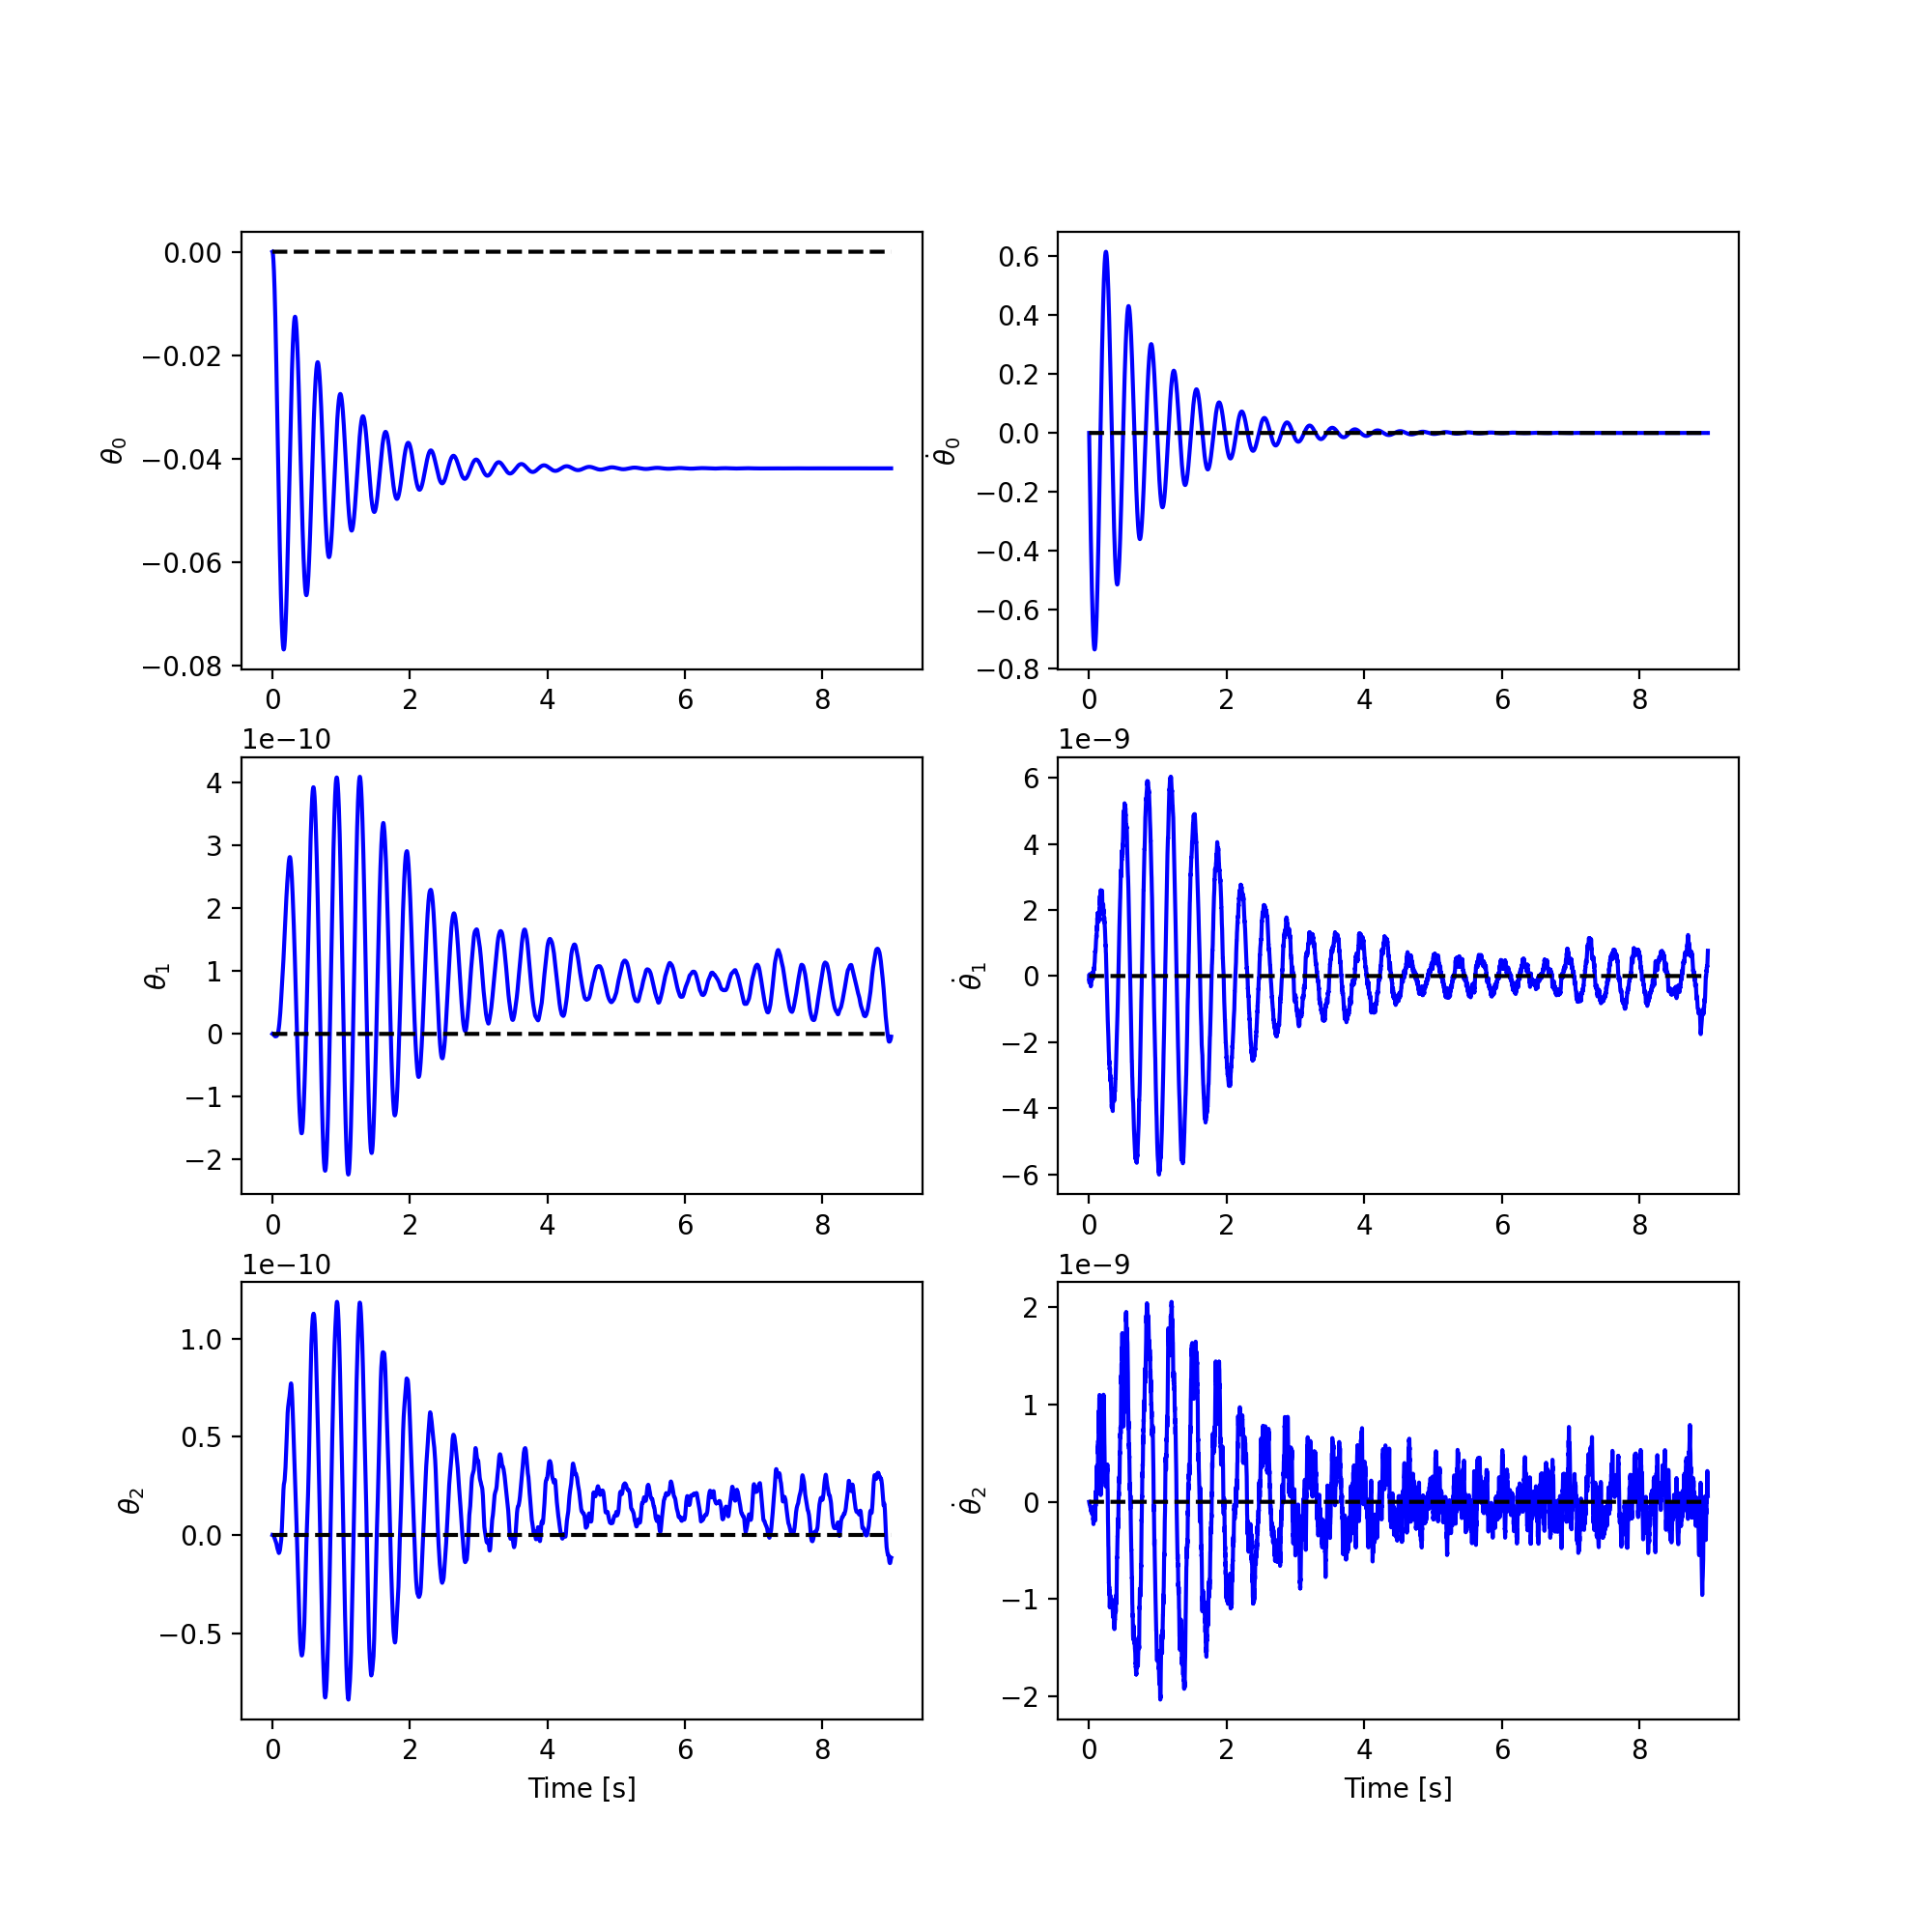

In [8]:
def plot_joint_posvel(time, th, th_des, dth, dth_des):
    fig = plt.figure(figsize=(10,10))
    
    plt.subplot(3,2,1)
    plt.plot(time, th[:,0], 'b-', time, th_des[:,0], '--k')
    plt.ylabel(r'$\theta_0$')
    plt.subplot(3,2,3)
    plt.plot(time, th[:,1], 'b-', time, th_des[:,1], '--k')
    plt.ylabel(r'$\theta_1$')
    plt.subplot(3,2,5)
    plt.plot(time, th[:,2], 'b-', time, th_des[:,2], '--k')
    plt.ylabel(r'$\theta_2$')
    plt.xlabel('Time [s]')
    
    plt.subplot(3,2,2)
    plt.plot(time, dth[:,0], 'b-', time, dth_des[:,0], '--k')
    plt.ylabel(r'$\dot{\theta}_0$')
    plt.subplot(3,2,4)
    plt.plot(time, dth[:,1], 'b-', time, dth_des[:,1], '--k')
    plt.ylabel(r'$\dot{\theta}_1$')
    plt.subplot(3,2,6)
    plt.plot(time, dth[:,2], 'b-', time, dth_des[:,2], '--k')
    plt.ylabel(r'$\dot{\theta}_2$')
    plt.xlabel('Time [s]')
    
plot_joint_posvel(time, measured_positions, desired_positions, measured_velocities, desired_velocities)